In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Consider 4 Deposit-Interest Rate models:
1. Initial Deposit at t = 0 and continous compouning
2. Initial Deposit plus Deposit and Withdrawls as a continous function of time
3. Discrete deposits at uneven time intervals
4. Varying Interest Rate as a function of t

## 1. Simple Time value growth model

Start by considering the simplest model -> the interest on the deposit (and hence the total amount) grows continously in proportion to the deposit amount y, at a constant rate of interest of r. Starting with initial deposit $y_0$ at t = 0, the final deposit {y} at t = t can be computed as:

$$
\frac{dy}{dt} = ry \\
\frac{dy}{y} = r dt \\
Integrating both sides,\\
\int_{y_0}^{y} \frac{dy}{y} = \int_{0}^t r dt \\
ln(y) - ln(y_0) = rt \\
ln \frac{y}{y_0} = rt\\
\frac{y}{y_0} = e^{rt}\\
y = y_0e^{rt}
$$




In [2]:
r = 0.05
t = 50
y0 = 100

In [3]:
def function(t,y):
    return r*y
def trueSolution(t,y):
    return y*np.exp(r*t)

In [4]:
def RungeKutta(time,h,f = []):
    for t in time:
        y = f[-1]
        k1 = function(t,y)
        k2 = function(t+h/2,y+h*k1/2)
        k3 = function(t+h/2,y+h*k2/2)
        k4 = function(t+h,y+h*k3)
        f.append(y + (k1 + 2*k2 + 2*k3 + k4)*h/6)
    return f[:len(time)]    

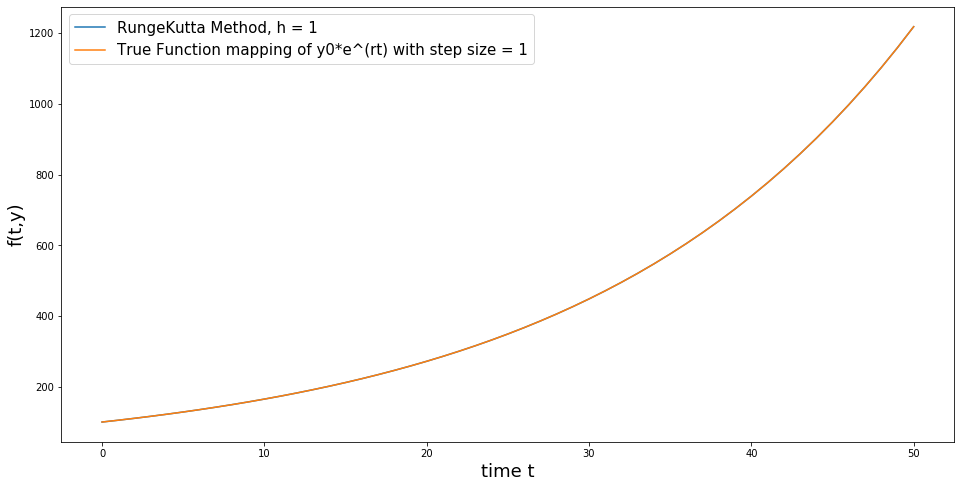

In [5]:
h = 1
time = np.arange(0,t+h,h)
f = [100]

fig = plt.figure(figsize = (16,8))
plt.plot(time,RungeKutta(time,h,[100]),label = "RungeKutta Method, h = "+str(h))
plt.plot(time,trueSolution(time,y0), label = "True Function mapping of y0*e^(rt) with step size = "+str(h))
plt.legend(loc='upper left',prop ={'size': 15})
plt.xlabel("time t",fontsize = 18)
plt.ylabel("f(t,y)",fontsize = 18)
plt.show()

## 2. Continous New Deposits at the rate of $q(t)$

Let new deposits keep coming at the rate of q(t). The change in amount over time can now be written as a function of both interest added (on outstanding amount) and new deposits added

$$
\frac{dy}{dt} = ry + q(t) \\
$$
The solution to this equation is:
$$
y(t) = y_0 e^{rt} + \int_{s = 0}^{s = t} e^{r(t-s)}q(s) ds
$$

But let us only solve it numerically using Runge-Kutta.

Consider q(t) to be a function of sin(t) indicating sinusoidal deposits when sin (t) > 0 and withdrawls when sin (t) < 0.

Starting with $100, using the same initial paramters and additionally depositing (or withdrawing) 100 sin(t).

$\frac{dy}{dt} = f(t,y) = 0.05y + 100 sin(t)$

In [6]:
r = 0.05
t = 10
y0 = 100
q = lambda x:100*np.sin(x)

In [7]:
def function(t,y):
    return r*y + q(t)

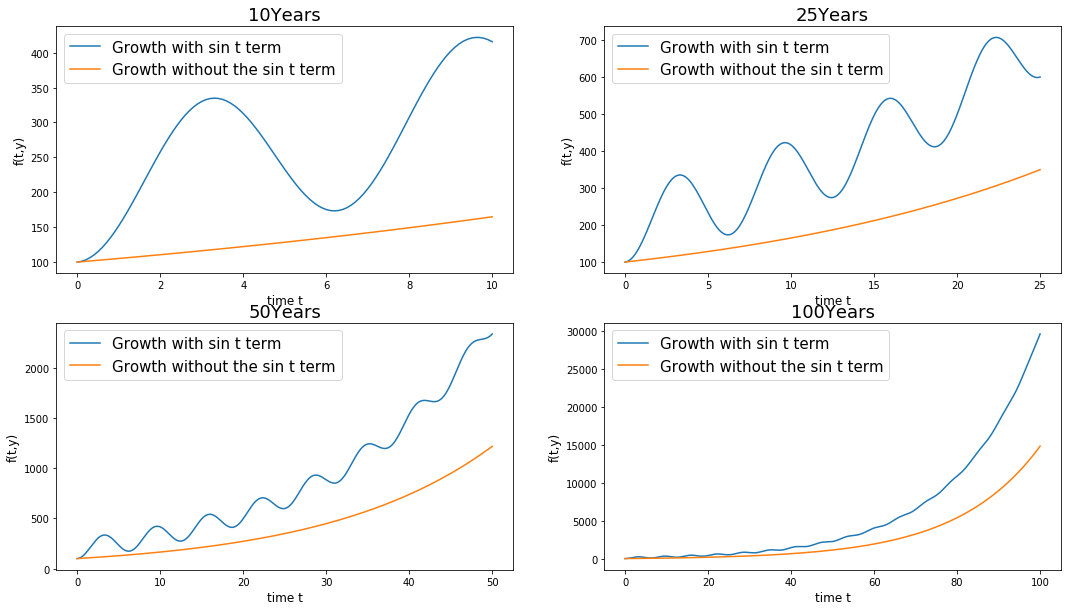

In [8]:
h = 0.1

f = [100]

fig, axes = plt.subplots(2,2,figsize = (18,10))
for i,t in enumerate([10,25,50,100]):
    time = np.arange(0,t+h,h)
    plt.subplot(2,2,i+1)
    plt.plot(time,RungeKutta(time,h,[100]),label = "Growth with sin t term")
    plt.plot(time,trueSolution(time,y0), label = "Growth without the sin t term")
    plt.legend(loc='upper left',prop ={'size': 15})
    plt.xlabel("time t",fontsize = 12)
    plt.ylabel("f(t,y)",fontsize = 12)
    plt.title(str(t) + "Years",fontsize = 18)
plt.show()

Note how initial phase of investing before withdrawing starts leads to a much higher interest earned over time. Also, with time, sinusoidal nature of the curve starts to flatten as the deposit/withdraw amount shrinks w.r.t. total invested amount.

## 3. Discrete deposit and continous compunding case

To simulate deposit, we use a step function $H(t)$ and delta function $\delta(t)$ defined as:

$$
H(t) = \left\{
    \begin{array}\\
        0 & \mbox{if } \ t < 0 \\
        1 & \mbox{if } \ t > 0 \\
    \end{array}
\right.
$$

The derivative of the Step function, $H(t)$ is the Delta Function $\delta(t)$. So  

$$
\frac{dH}{dt} = \delta(t) \\
\int_{-\infty}^{+\infty} \delta(t) = H(t = +\infty) - H(t = -\infty) = 1 - 0 = 1
$$
The delta function, $\delta(t)$ can be thought of as a infite shock at t = 0 and is zero everywhere else

Our differential equation that has deposits of $y_i$ at times $t_i$ for i = 1,2,...,n can thus be represented as:
$$
\frac{dy}{dt} = ry + y_1\delta(t-t_1) + y_2\delta(t-t_2) + ...\\
$$

Imagine initial seposit of 0 and subsequent deposits of $200 at t = 1 year, and another deposit of 100 at t = 10 year

$$
\frac{dy}{dt} = 0.05y + 200\delta(t-1) + 100\delta(t-10) \\
Initial Deposit = 0
$$

In [9]:
def delta(t):
    if t < 0 < (t+h): return 1/h
    else: return 0
def function(t,y):
    return r*y + 200*delta(t-1) + 100*delta(t-10)

In [10]:
r = 0.05
t = 20

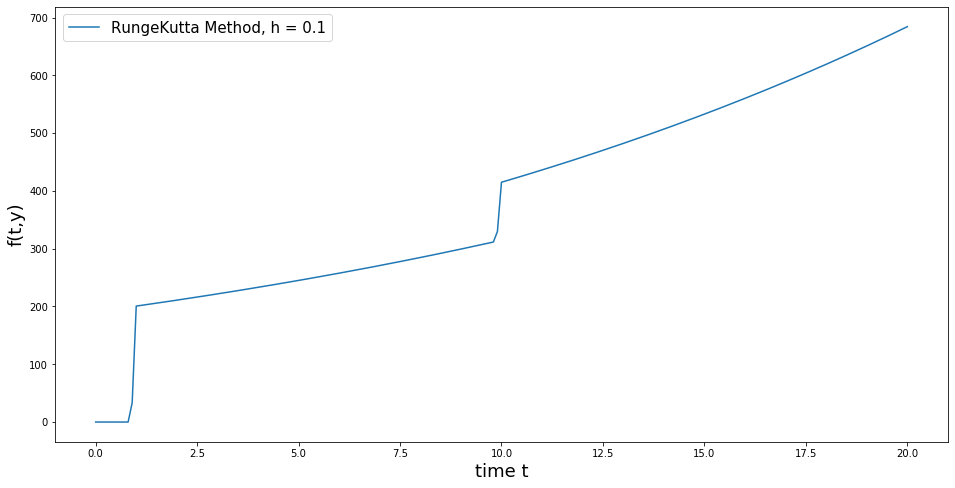

In [12]:
h = 0.1
time = np.arange(0,t+h,h)
f = [0]

fig = plt.figure(figsize = (16,8))
plt.plot(time,RungeKutta(time,h,[0]),label = "RungeKutta Method, h = "+str(h))
plt.legend(loc='upper left',prop ={'size': 15})
plt.xlabel("time t",fontsize = 18)
plt.ylabel("f(t,y)",fontsize = 18)
plt.show()

### 4. Interest Rate are a function of t

$$\frac{dy}{dt} = r(t) y + q(t)$$
Note here, that the interest rates vary over time as r(t)

We use an Integrating Factor, M and multiply both sides by it to solve this equation. 

Standard Linear Form:
$$
\frac{dy}{dt} - r(t)y = q(t) \\
M = e^{-\int_0^t r(T) dT} \\
\frac{d(My)}{dt} = Mq(t) \\
\int_{y_1}^{y_2}{d(My)} = \int_0^t Mq(t) dt \\
M(t)y(t) - M(0)y(0) = \int_0^t Mq(t) \\
$$



Example: $r(t) = 0.02t$ i.e. interest rates rise linearly by 2% each year. $q(t) = 0$

$$
\frac{dy}{dt} = 0.02ty \\
\frac{dy}{dt} - 0.02ty = 0 \\
M = e^{-\int_0^t -0.02T dT} = e^{\frac{-0.02t^2}{2}} = e^{-0.01t^2} \\
M(0) = e^0 = 1 \\
y(0) = 100 \\
e^{-0.01t^2} y (t) = 100 \\
y(t) = 100e^{0.01t^2} \\
$$
  
**Note that at t = 10, $ y(10) = 100e^1$. This is  also the solution of $y = y_0e^{rt}$ at r = 10% and t = 10 years. Thus, the amount y(10) is the same from investing at a constant rate of 10% for 10 years and from investing at an interest rate of 0% at time 0 and increasing at a rate of 2% p.a.**

In [40]:
r = lambda x:0.02*x
def function(t,y):
    return r(t)*y
def trueSolution(t,y):
    return 100/(np.exp(-0.01*t**2))
def constantInterstRate(t,y):
    return y*np.exp(0.1*t)

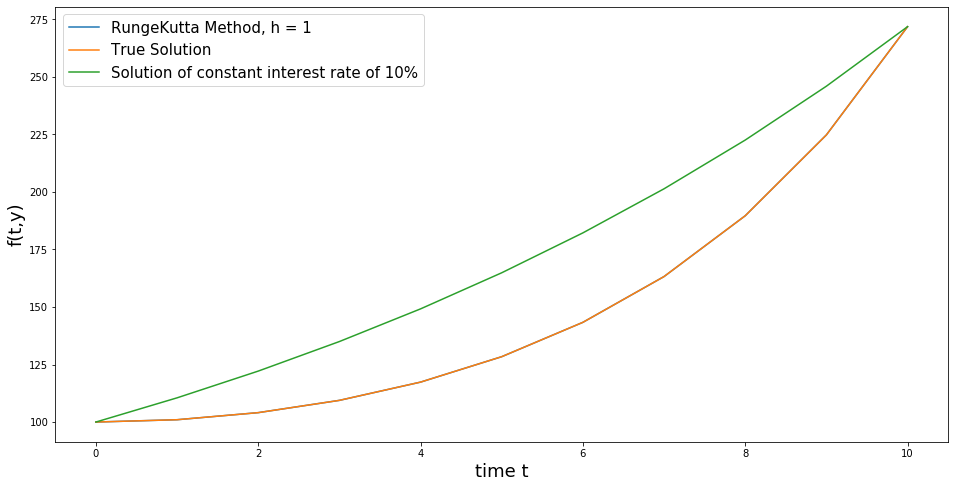

In [42]:
t = 10
y0 = 100
h = 1
time = np.arange(0,t+h,h)

fig = plt.figure(figsize = (16,8))
plt.plot(time,RungeKutta(time,h,[100]),label = "RungeKutta Method, h = "+str(h))
plt.plot(time,trueSolution(time,y0), label = "True Solution")
plt.plot(time,constantInterstRate(time,y0), label = "Solution of constant interest rate of 10%")
plt.legend(loc='upper left',prop ={'size': 15})
plt.xlabel("time t",fontsize = 18)
plt.ylabel("f(t,y)",fontsize = 18)
plt.show()